<a href="https://colab.research.google.com/github/Abhik4004/Story/blob/main/Sound_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
from scipy import signal
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path='/content/drive/MyDrive/Audio/emergency.wav'
emergency,sample_rate    = librosa.load(path, sr = 16000)
path='/content/drive/MyDrive/Audio/non emergency.wav'
non_emergency,sample_rate= librosa.load(path, sr =16000)

In [ ]:
duration1 = librosa.get_duration(y=emergency, sr=16000)
duration2 = librosa.get_duration(y=non_emergency, sr=16000)
print("Duration of an emergency and Non Emergency (in min):", duration1/60, duration2/60)

Duration of an emergency and Non Emergency (in min): 22.920290625 27.160834375


In [ ]:
def prepare_data(samples, num_of_samples=32000, num_of_common=16000):
  data=[]
  for offset in range(0, len(samples), num_of_common):
    start = offset
    end   = offset + num_of_samples
    chunk = samples[start:end]
    if(len(chunk)==32000):
      data.append(chunk)
  return data

In [ ]:
emergency = prepare_data(emergency)
non_emergency = prepare_data(non_emergency)

In [ ]:
print("No. of Chunks of Emergency and Non Emergency:",len(emergency),len(non_emergency))

No. of Chunks of Emergency and Non Emergency: 1374 1628


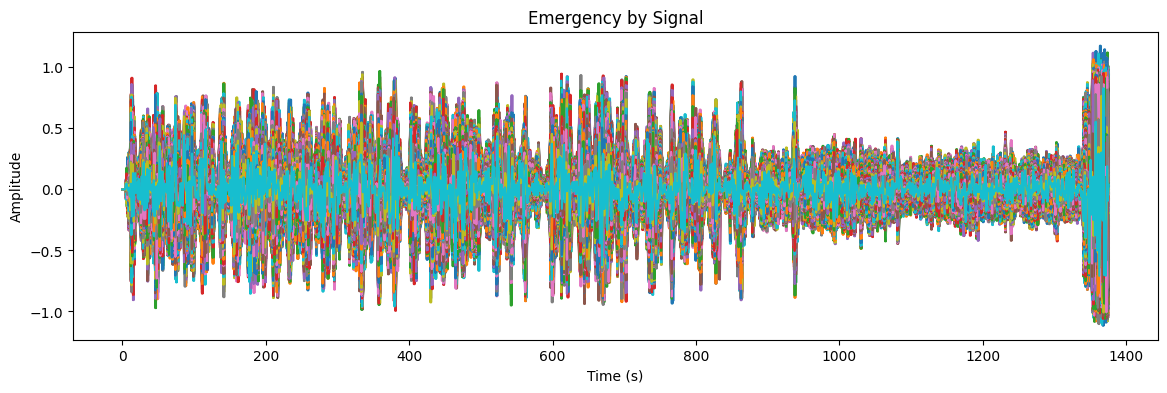

In [ ]:
# Plot the entire emergency signal
plt.figure(figsize=(14, 4))
time1 = np.linspace(0, duration1, num=len(emergency))
plt.plot(time1, emergency)
plt.title('Emergency by Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

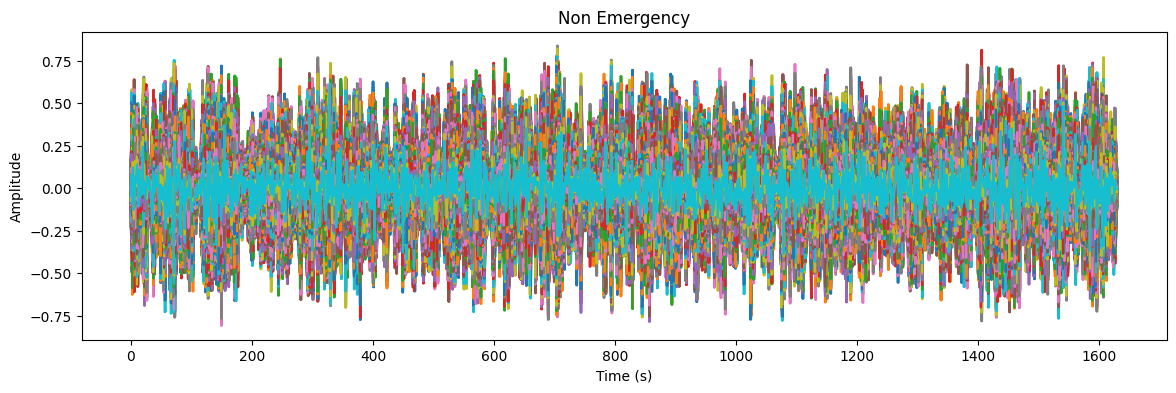

In [ ]:
plt.figure(figsize=(14, 4))
time2 = np.linspace(0, duration2, num=len(non_emergency))
plt.plot(time2, non_emergency)
plt.title('Non Emergency')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
audio = np.concatenate([emergency,non_emergency])
labels1 = np.zeros(len(emergency))
labels2 = np.ones(len(non_emergency))
labels = np.concatenate([labels1,labels2])
print(audio.shape)

(3002, 32000)


In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(audio),np.array(labels), stratify=labels,test_size = 0.1, random_state=777,shuffle=True)

In [ ]:
x_tr_features  = x_tr.reshape(len(x_tr),-1,1)
x_val_features = x_val.reshape(len(x_val),-1,1)
print("Reshaped Array Size",x_tr_features.shape)

Reshaped Array Size (2701, 32000, 1)


In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
def cnn(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))
  #First Conv1D layer
  conv = Conv1D(8, 13, padding='same', activation='relu')(inputs)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(2)(conv)
  #Second Conv1D layer
  conv = Conv1D(16, 11, padding='same', activation='relu')(conv)
  conv = Dropout(0.3)(conv)
  conv = MaxPooling1D(2)(conv)
  #MaxPooling 1D
  conv = GlobalMaxPool1D()(conv)
  #Dense Layer
  conv = Dense(16, activation='relu')(conv)
  outputs = Dense(1,activation='sigmoid')(conv)
  model = Model(inputs, outputs)
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
  model_checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_acc',
                                 verbose=1, save_best_only=True, mode='max')
  return model, model_checkpoint
model, model_checkpoint = cnn(x_tr_features)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32000, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 32000, 8)          112       
                                                                 
 dropout (Dropout)           (None, 32000, 8)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 16000, 8)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16000, 16)         1424      
                                                                 
 dropout_1 (Dropout)         (None, 16000, 16)         0         
                                                             

In [ ]:
history=model.fit(x_tr_features, y_tr ,epochs=10, callbacks=[model_checkpoint], batch_size=32, validation_data=(x_val_features,y_val))

Epoch 1/10
85/85 [==============================] - ETA: 0s - loss: 0.6019 - acc: 0.7186
Epoch 1: val_acc improved from -inf to 0.79070, saving model to best_model.hdf5
85/85 [==============================] - 86s 993ms/step - loss: 0.6019 - acc: 0.7186 - val_loss: 0.5772 - val_acc: 0.7907
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - ETA: 0s - loss: 0.4409 - acc: 0.8389
Epoch 2: val_acc improved from 0.79070 to 0.83721, saving model to best_model.hdf5
85/85 [==============================] - 81s 951ms/step - loss: 0.4409 - acc: 0.8389 - val_loss: 0.4676 - val_acc: 0.8372
Epoch 3/10
85/85 [==============================] - ETA: 0s - loss: 0.3458 - acc: 0.8656
Epoch 3: val_acc improved from 0.83721 to 0.85714, saving model to best_model.hdf5
85/85 [==============================] - 85s 1s/step - loss: 0.3458 - acc: 0.8656 - val_loss: 0.4085 - val_acc: 0.8571
Epoch 4/10
85/85 [==============================] - ETA: 0s - loss: 0.3211 - acc: 0.8730
Epoch 4: val_acc improved from 0.85714 to 0.86379, saving model to best_model.hdf5
85/85 [==============================] - 79s 926ms/step - loss: 0.3211 - acc: 0.8730 - val_loss: 0.3809 - val_acc: 0.8638
Epoch 5/10
85/85 [==============================] - ETA: 0s - loss: 0.3128 - acc: 0.8715
Epoch 5: val_acc did not improve from 0.863

In [86]:
model.load_weights('best_model.hdf5')

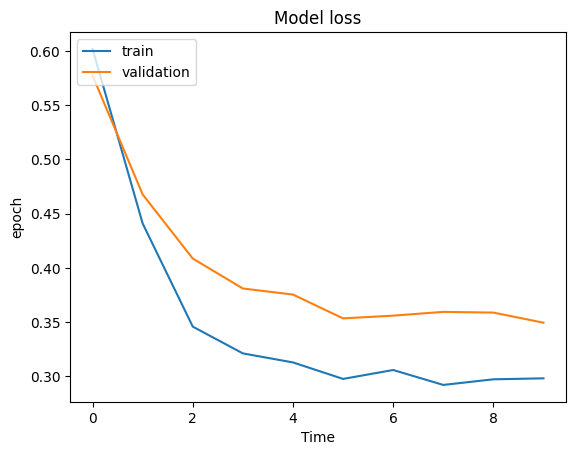

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Time')
plt.ylabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

In [88]:
_, acc = model.evaluate(x_val_features,y_val)
print("Validation Accuracy:",acc)

10/10 [==============================] - 5s 524ms/step - loss: 0.3534 - acc: 0.8771
Validation Accuracy: 0.8770763874053955


In [89]:
ind=35
test_audio = x_val[ind]
ipd.Audio(test_audio,rate=16000)
feature = x_val_features[ind]
prob = model.predict(feature.reshape(1,-1,1))
if (prob[0][0] < 0.5 ):
 pred='emergency'
else:
 pred='non emergency'
print("Prediction:",pred)

1/1 [==============================] - 0s 122ms/step
Prediction: emergency


In [90]:
def log_specgram(audio, sample_rate, eps=1e-10):
   nperseg  = 320
   noverlap = 160
   freqs, times, spec = signal.spectrogram(audio,fs=sample_rate,
                           nperseg=nperseg,noverlap=noverlap,detrend=False)
   return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [91]:
def plot(spectrogram,label):
 fig = plt.figure(figsize=(14, 8))
 ax = fig.add_subplot(211)
 ax.imshow(spectrogram.T, aspect='auto', origin='lower',extent=[times.min(),
                                 times.max(), freqs.min(), freqs.max()])
 ax.set_title('Spectrogram of '+label)
 ax.set_ylabel('Freqs in Hz')
 ax.set_xlabel('Seconds')

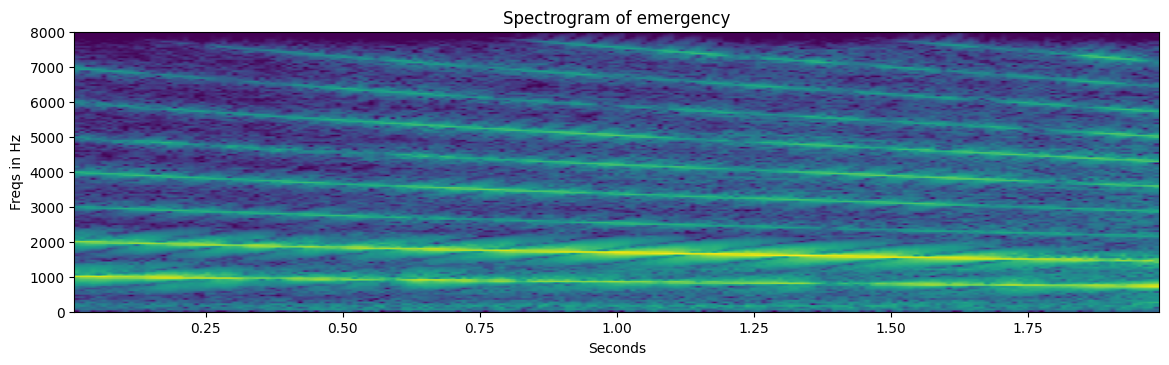

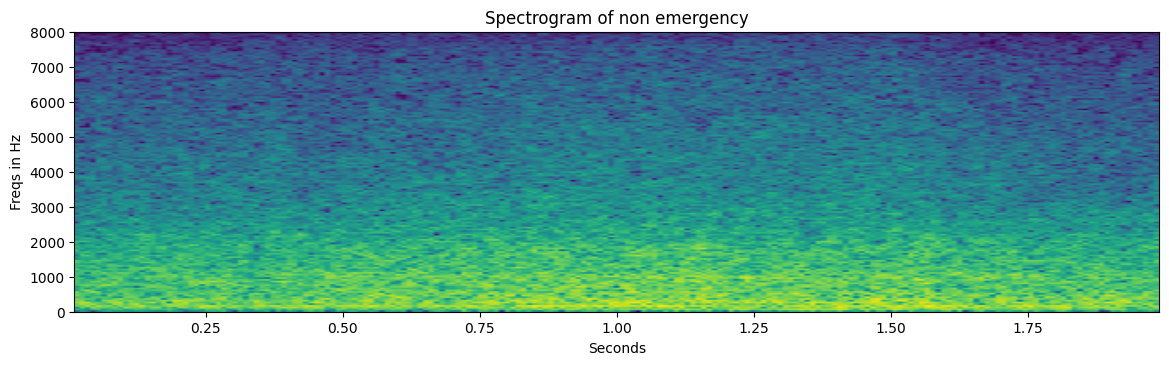

In [ ]:
freqs, times, spectrogram = log_specgram(emergency[300], sample_rate)
plot(spectrogram,"emergency")
freqs, times, spectrogram = log_specgram(non_emergency[300], sample_rate)
plot(spectrogram,"non emergency")

In [ ]:
def extract_spectrogram_features(x_tr):
 features=[]
 for i in x_tr:
   _, _, spectrogram = log_specgram(i, sample_rate)
   mean = np.mean(spectrogram, axis=0)
   std = np.std(spectrogram, axis=0)
   spectrogram = (spectrogram - mean) / std
   features.append(spectrogram)
 return np.array(features)

In [ ]:
def lstm(x_tr):
  K.clear_session()
  inputs = Input(shape=(x_tr.shape[1],x_tr.shape[2]))
  #lstm
  x = LSTM(128)(inputs)
  x = Dropout(0.3)(x)
    #dense
  x= Dense(64,activation='relu')(x)
  x= Dense(1,activation='sigmoid')(x)
  model = Model(inputs, x)
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
  return model
model = lstm(x_tr_features)
model.summary()
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True,
                                   mode='max')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 199, 161)]        0         
                                                                 
 lstm (LSTM)                 (None, 128)               148480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 156801 (612.50 KB)
Trainable params: 156801 (612.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(x_tr_features, y_tr, epochs=5, callbacks=[mc], batch_size=32,
                                         validation_data=(x_val_features,y_val))

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7b5beff7e560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


85/85 [==============================] - ETA: 0s - loss: 0.6301 - acc: 0.6379
Epoch 1: val_acc improved from -inf to 0.76080, saving model to best_model.hdf5
85/85 [==============================] - 85s 389ms/step - loss: 0.6301 - acc: 0.6379 - val_loss: 0.5235 - val_acc: 0.7608
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - ETA: 0s - loss: 0.3686 - acc: 0.8545
Epoch 2: val_acc improved from 0.76080 to 0.86047, saving model to best_model.hdf5
85/85 [==============================] - 30s 358ms/step - loss: 0.3686 - acc: 0.8545 - val_loss: 0.3390 - val_acc: 0.8605
Epoch 3/10
85/85 [==============================] - ETA: 0s - loss: 0.3311 - acc: 0.8660
Epoch 3: val_acc improved from 0.86047 to 0.87708, saving model to best_model.hdf5
85/85 [==============================] - 30s 348ms/step - loss: 0.3311 - acc: 0.8660 - val_loss: 0.2773 - val_acc: 0.8771
Epoch 4/10
85/85 [==============================] - ETA: 0s - loss: 0.2314 - acc: 0.9097
Epoch 4: val_acc did not improve from 0.87708
85/85 [==============================] - 26s 310ms/step - loss: 0.2314 - acc: 0.9097 - val_loss: 0.3746 - val_acc: 0.8372
Epoch 5/10
85/85 [==============================] - ETA: 0s - loss: 0.1507 - acc: 0.9434
Epoch 5: val_acc improved from 0.87708 to 0.96678, saving model to best_model

In [ ]:
model.load_weights('best_model.hdf5')

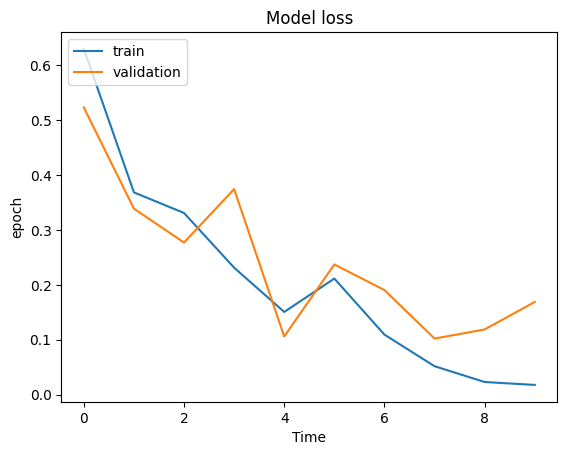

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Time')
plt.ylabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

In [ ]:
x_tr_features  = extract_spectrogram_features(x_tr)
x_val_features = extract_spectrogram_features(x_val)

In [ ]:
model.load_weights('best_model.hdf5')
_,acc = model.evaluate(x_val_features,y_val)
print("Accuracy:",acc)

10/10 [==============================] - 2s 205ms/step - loss: 0.1022 - acc: 0.9701
Accuracy: 0.970099687576294
